# Quickstart
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/asaboor-gh/ipyvasp/HEAD?urlpath=%2Fdoc%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2Fquickstart.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ipyvasp as ipv

## Transform POSCAR
Let's create some dummy POSCAR.

In [3]:
poscar = ipv.POSCAR.new(
    [[0.5, 0.5, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, 0.5]],
    {"Ga": [[0.0, 0.0, 0.0]],"As": [[0.25, 0.25, 0.25]]},
    
    scale = 5
)

poscar.write("POSCAR",overwrite=True) # need it later

site_kws = dict(alpha=1)
ax1, ax2, ax3 = ipv.get_axes((8,3),ncols=3, axes_3d=[0,1,2])

poscar.splot_lattice( ax = ax1, fill = False,label='original',
    site_kws=site_kws)

_ = poscar.transform(lambda a,b,c: (b+c-a, a+c-b, a+b-c)).transpose([1,2,0]) # bring a1 to x
print(poscar.last.data.metadata.TM)
poscar.last.splot_lattice( # .last points to last created POSCAR in transform
    ax=ax2, fill = False, color='red', label='transformed',
    site_kws=site_kws
)
poscar.last.splot_plane([1,1,0],1/2,ax=ax2)

poscar.transform(lambda a,b,c: (a-c,b-c,a+b+c)
).set_zdir([0,0,1]).splot_lattice(ax=ax3,color='red')

print(poscar.last.data.metadata.TM)
ax1.view_init(azim=-25, elev=15)
ax2.view_init(azim=-35, elev=15)

[[0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]
[[ 0.66666667 -0.33333333  0.33333333]
 [-0.33333333  0.66666667  0.33333333]
 [-0.33333333 -0.33333333  0.33333333]]


<Figure size 1152x432 with 0 Axes>

In [ ]:
poscar.splot_bz(fill = True,color='skyblue', vectors=None,lw=0.1).set_axis_off()
ax = poscar.splot_kpath([(0,0,0), (1/4,1/2,-1/4), (0.5,0.5,0), (0,0,0), (0,0.5,0)],
    labels = ['Γ', 'K', 'X', 'Γ', 'L'], fmt_label=lambda lab: lab+'\n')
ax.view_init(azim=55, elev=25)

In [ ]:
fig = poscar.iplot_bz(color='blue')
ipv.iplot2html(fig)

## K-Path
We can interplate kpath based on current POSCAR, it gives correct distance between points.

In [ ]:
poscar.get_kpath([
    (0,0,0,'Γ'), 
    (1/4,1/2,-1/4,'K'), 
    (0.5,0.5,0,'X'), 
    (0,0,0,'Γ'), 
    (0,0.5,0,'L')
    ], n=8)

In [ ]:
poscar.get_kmesh(2,2,2, weight=0)

In [ ]:
view = poscar.view_weas(colors={'Ga':'red','As':'blue'})
view

If you are not seeing interactive widget above, don't worry! We've got you covered with a screenshot below:

In [ ]:
view.download_image('weas.png')

<img src="weas.png" alt="GaAs" width="600"/>

## Live View of POSCAR Operations
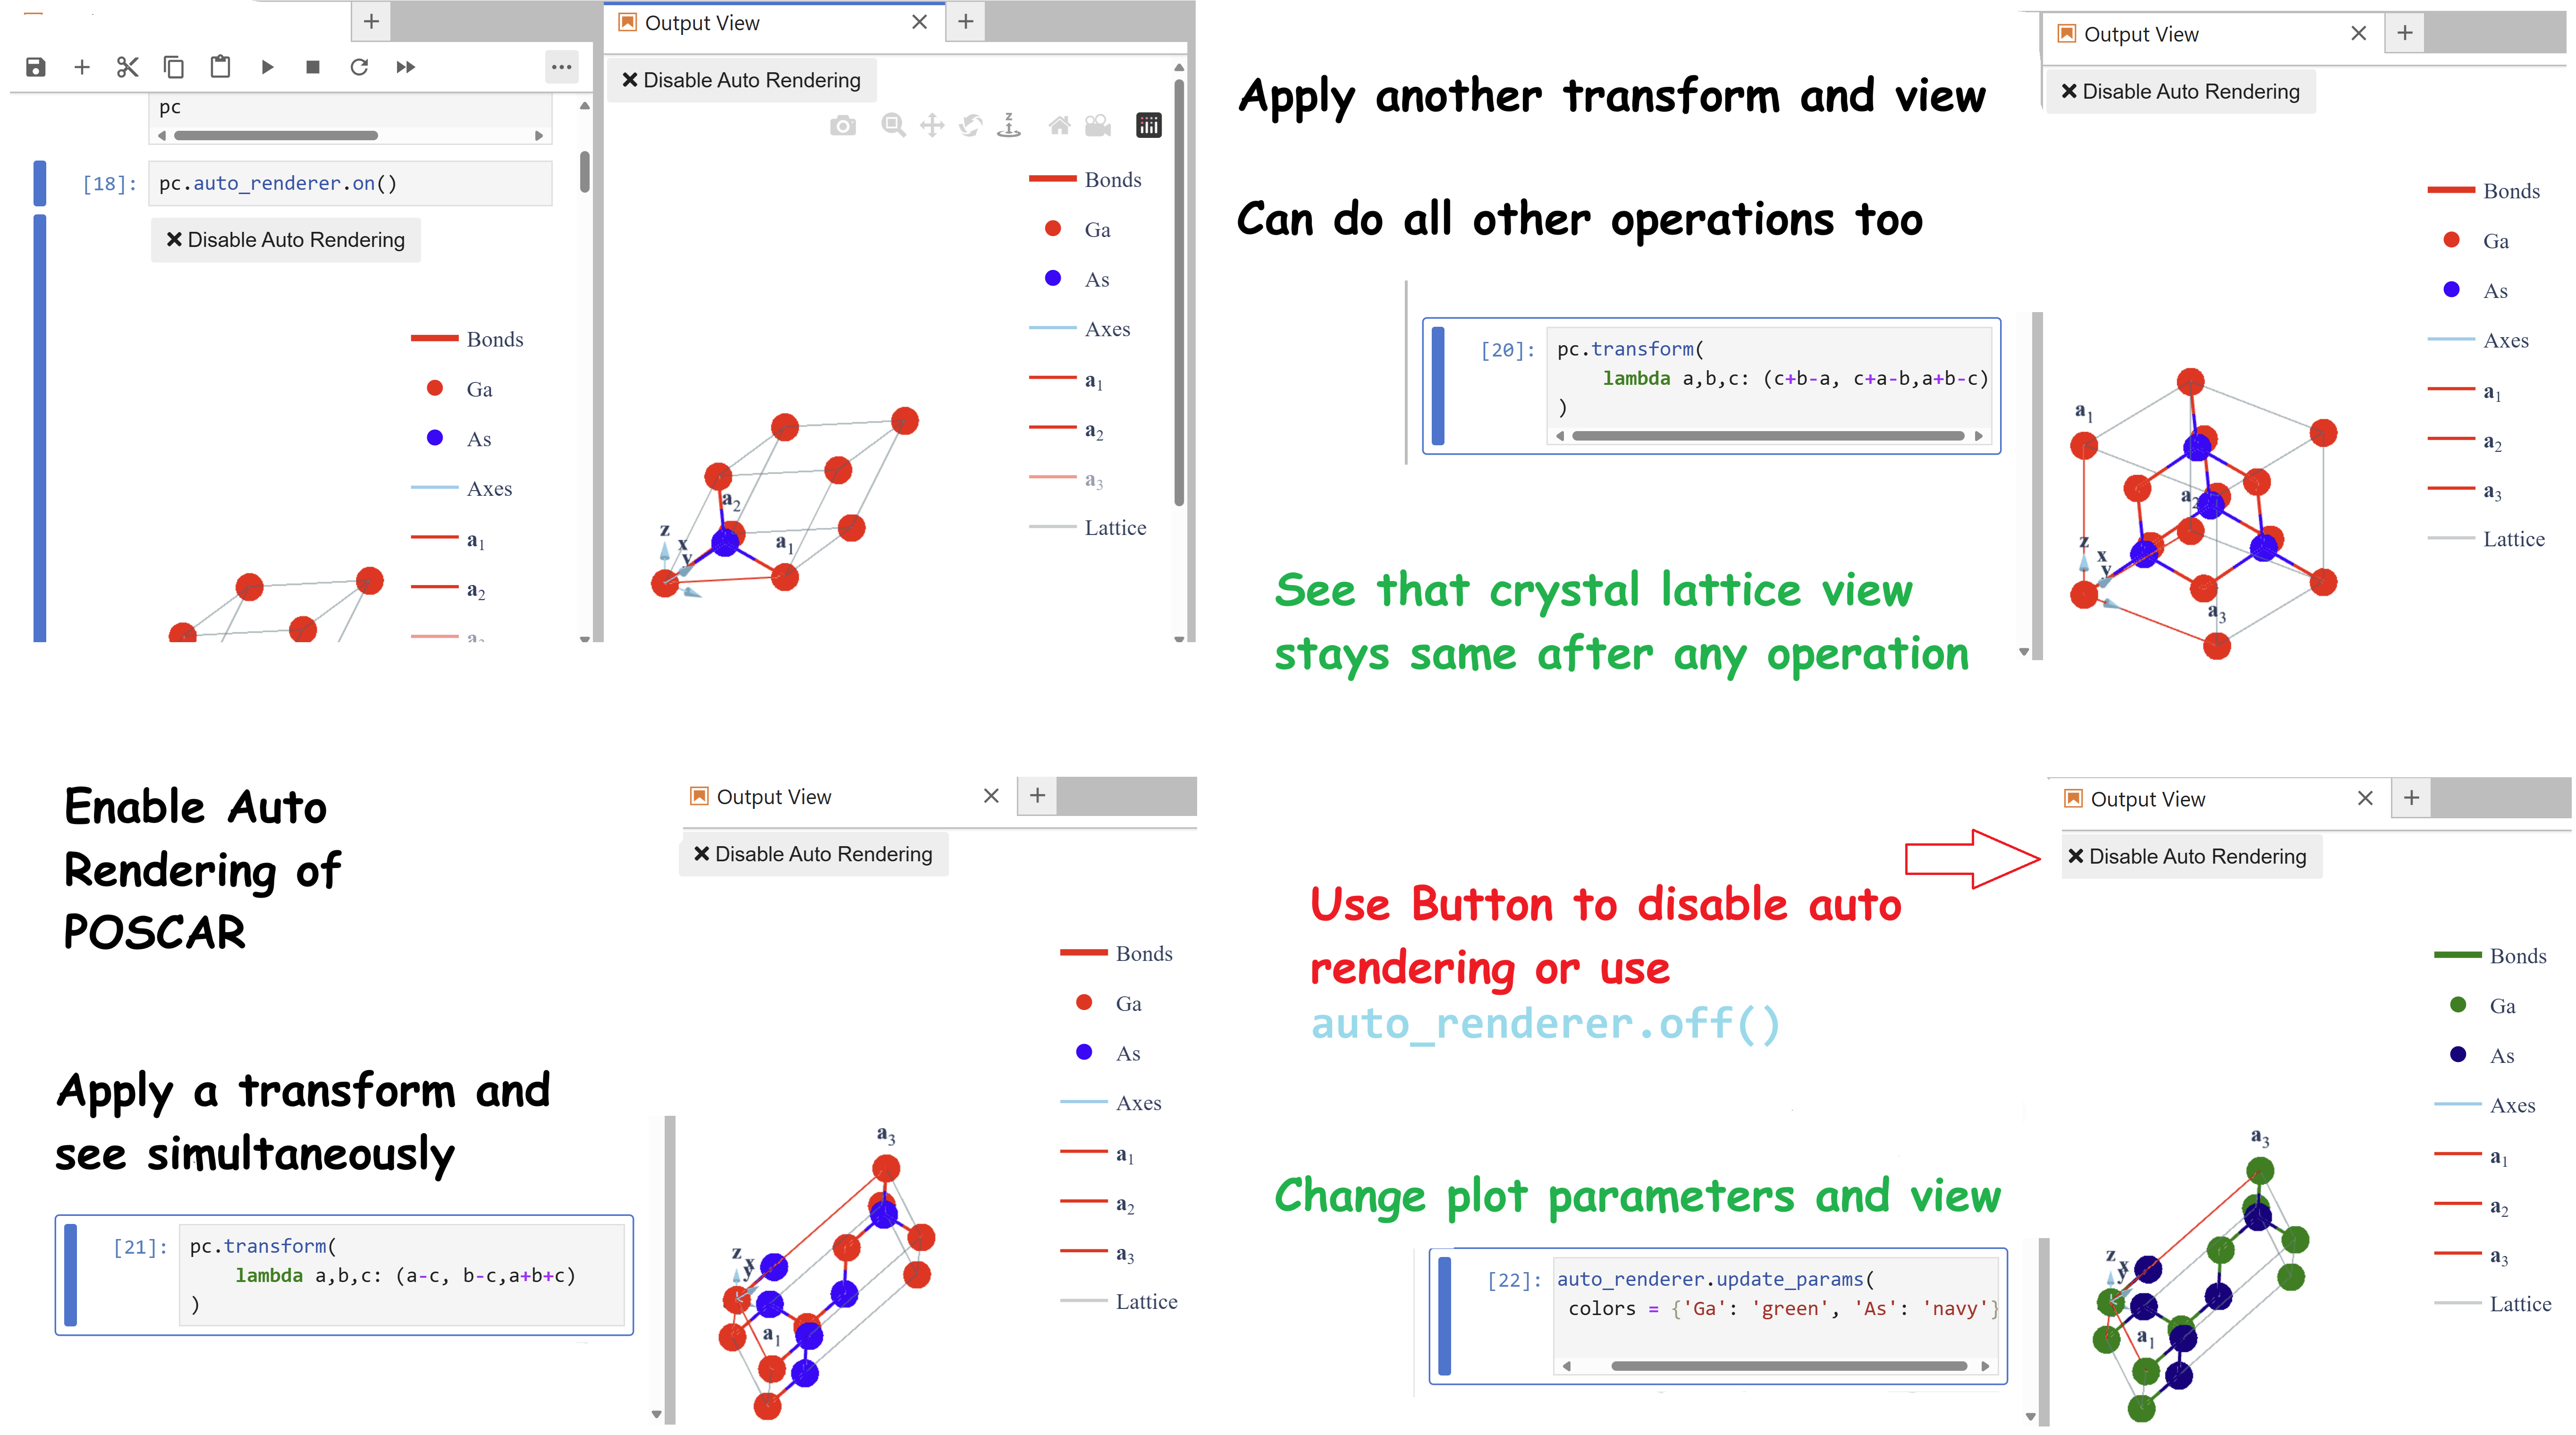

## Batch analysis using `Files` class.


In [ ]:
files = ipv.Files('.')
files

In [ ]:
files.summarize(lambda path: {'end': path.parts[-1]})

In [ ]:
files.map(lambda p: p.suffix,to_df=True)

In [ ]:
files.interactive(lambda file: print(file))

In [ ]:
files.filtered('py')

### Example: View Lattice and BZ side by side

In [ ]:
import plotly.graph_objects as go
import ipyvasp as ipv
fs = ipv.Files('.','POSCAR')

@fs.interact(fig1 = go.FigureWidget(), fig2 = go.FigureWidget(),
    app_layout={"left_sidebar": ('file', 'fig2'), 'center':('fig1',),'pane_widths':[2,3,0]})
def view(file, fig1, fig2):
    pos = ipv.POSCAR(file)
    ipv.iplot2widget(pos.iplot_bz(), fig_widget=fig2)
    ipv.iplot2widget(pos.iplot_lattice(), fig_widget=fig1)

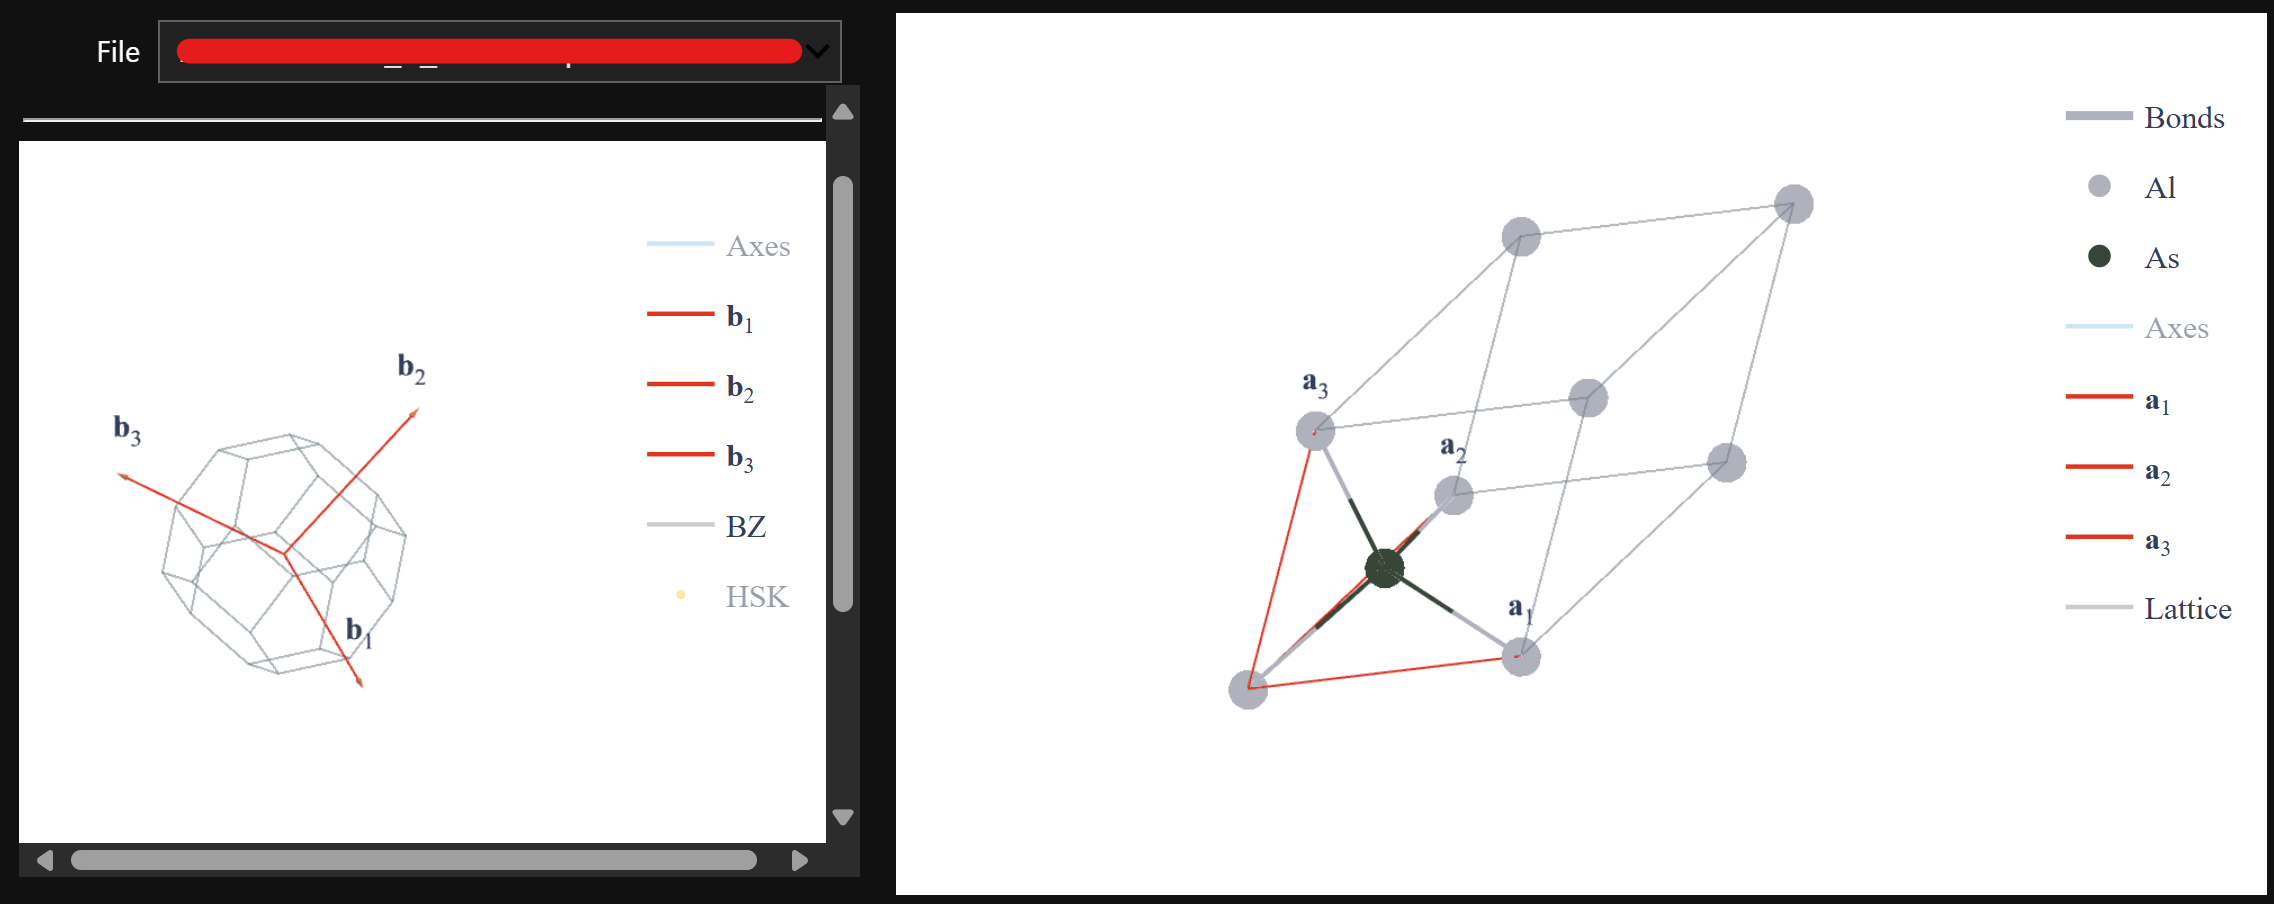